# ML - Final Assignment
#### By Christopher Bishop (#500791964), Paul Boutot (#500741332) & Joseph Grgic (#500759884)


# Project Description
This project is about categrozing food images similair to that of assignment 2. Inspired by the [SeeFood App in the show Sillicon Valley](https://www.youtube.com/watch?v=vIci3C4JkL0), we hope to do better than Jian Yang and not just identify if Hotdog or Not Hotdog, we want to correctly identefy each type of the over 100 foods in the data set.  

# Import Packages

In [1]:
import h5py
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

# Setup Datasets

In [2]:
# Files
training_file = 'food_c101_n10099_r64x64x3.h5'  # Can also use food_c101_n10099_r64x64x3.h5 if we want a bigger data set
test_file = 'food_test_c101_n1000_r64x64x3.h5'

# Gets the path to the Files
training_path = os.path.join('..', 'data', training_file)
testing_path = os.path.join('..', 'data', test_file)

# Opens the files as readonly
h5f_training = h5py.File(training_path, 'r')
h5f_testing = h5py.File(testing_path, 'r')

# Gets the features
X_training = h5f_training['images'][()]  # [()] is the same as .values - .values is deprecated for h5 files
X_testing = h5f_testing['images'][()]

# Gets the shape
X_shape = X_training.shape[1:]

# Gets the labels
y_training = h5f_training['category'][()]
y_testing = h5f_testing['category'][()]  # Columns of true or false based on label - ie. True and False Matrix from A2

# Gets the shape
y_shape = y_training.shape[1:]

# Prints the size
print("------------------------------------")
print("Training X Data: ", X_training.shape)
print("Training y Data: ", y_training.shape)
print("------------------------------------")
print("Testing X Data:  ", X_testing.shape)
print("Testing y Data:  ", y_testing.shape)
print("------------------------------------")

# List of all Labels in the data (ie Apple Pie, Donuts, Pizza, Waffles...)
labels = []
for label in h5f_training['category_names'][:]:
    labels.append(label.decode())
print("Number of Labels - Y Data: ", len(labels))

print("------------------------------------")

print(X_shape)
print(y_shape)


------------------------------------
Training X Data:  (10099, 64, 64, 3)
Training y Data:  (10099, 101)
------------------------------------
Testing X Data:   (1000, 64, 64, 3)
Testing y Data:   (1000, 101)
------------------------------------
Number of Labels - Y Data:  101
------------------------------------
(64, 64, 3)
(101,)


# Helper Functions

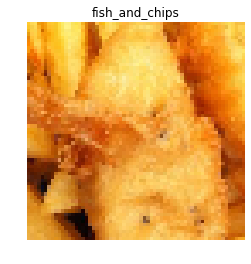

In [3]:
# Displays an image
def displayImage(images, categories, index):
    sample = images[index, :]
    plt.imshow(sample if sample.shape[2]==3 else sample[:,:,0], cmap = 'gray')
    plt.axis('off')
    plt.title(labels[np.argmax(categories[index])])
    plt.show()

sampleindex = np.random.randint(0,1000)
displayImage(X_training, y_training, sampleindex)

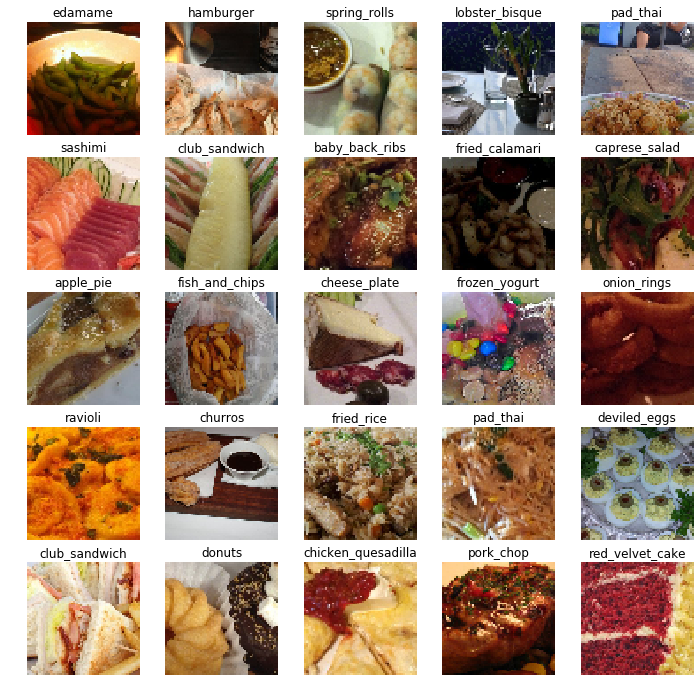

In [4]:
# Displays multiple images
def displayImages(images, categories, indices=slice(0,25), rows=5, cols=5):
    fig, m_ax = plt.subplots(rows, cols, figsize = (12, 12))
    for c_ax, c_label, c_img in zip(m_ax.flatten(), categories[indices], images[indices]):
        c_ax.imshow(c_img if c_img.shape[2]==3 else c_img[:,:,0], cmap = 'gray')
        c_ax.axis('off')
        c_ax.set_title(labels[np.argmax(c_label)])

displayImages(X_training, y_training)

In [5]:
def encode(row):
    return np.argwhere(row==True)

def encode_all(categories):
    arr = np.empty([categories.shape[0],1])
    for i in range(np.size(categories,0)):
        arr[i] = encode(categories[i,:])
    return arr

encode_all(y_training)

array([[33.],
       [53.],
       [92.],
       ...,
       [30.],
       [87.],
       [15.]])

In [6]:
def decode_all(encodings, classes=101):
    arr = np.zeros([encodings.shape[0],classes])
    for i in range(np.size(encodings,0)):
        arr[i, int(encodings[i])] = 1
    return arr

np.argwhere(decode_all(encode_all(y_training)[0], 101)==1)
decode_all(encode_all(y_training))[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [7]:
def to_bool(decodings):
    return decodings.astype(bool)

to_bool(decode_all(encode_all(y_training), 101))[0]

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

# Preparation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

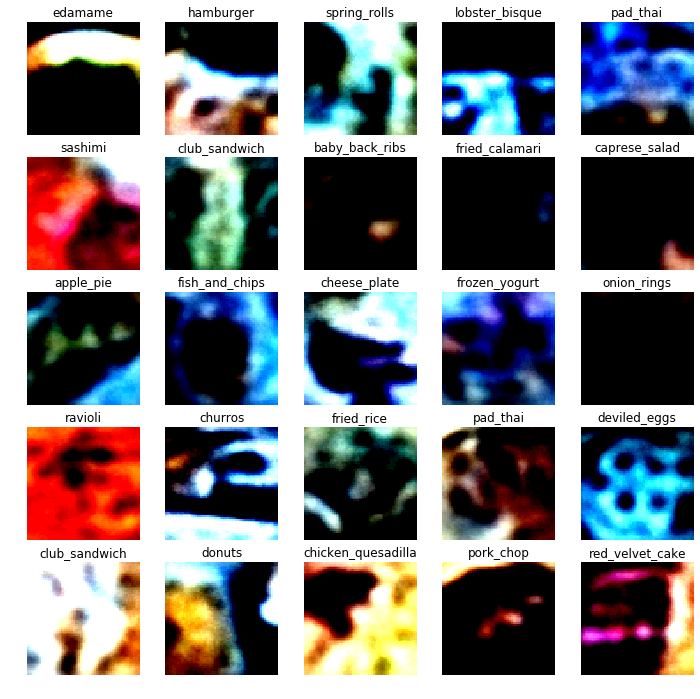

In [8]:
# Scales the data
def RunPCA(principal_components=100):
    from sklearn.preprocessing import StandardScaler

    # Gets the shape as a 2D array
    num = 1
    for i in X_shape:
        num *= i

    # Multi-class problem
    X_scaled_training = X_training.reshape(X_training.shape[0], num).copy().astype(float)
    X_scaled_testing = X_testing.reshape(X_testing.shape[0], num).copy().astype(float)

    # Fits the X data - Multi-class problem
    scaler = StandardScaler()
    scaler.fit(X_scaled_training)

    # Scales the X data - Multi-class problem
    X_scaled_training = scaler.transform(X_scaled_training)
    X_scaled_testing = scaler.transform(X_scaled_testing)

    # Gets the Y data - Multi-class problem
    y_scaled_training = y_training[:,:].copy()
    y_scaled_testing = y_testing[:,:].copy()

    ###################################################################################
    # PCA                                                                             #
    ###################################################################################
    from sklearn.decomposition import PCA

    # Fits the X data
    pca = PCA(n_components=principal_components)
    pca.fit(X_scaled_training)

    # Transforms the data
    X_pca_training = pca.transform(X_scaled_training)
    X_pca_testing = pca.transform(X_scaled_testing)

    # Gets the Y data - Multi-class problem
    y_pca_training = y_scaled_training[:,:].copy()
    y_pca_testing = y_scaled_testing[:,:].copy()

    # Visualize the changes
    X_pca_inverse = pca.inverse_transform(X_pca_training)
    X_pca_inverse = X_pca_inverse.reshape([X_pca_inverse.shape[0], X_shape[0], X_shape[1], X_shape[2]])
    displayImages(X_pca_inverse, y_pca_training)
    
    return X_pca_training, X_pca_testing, y_pca_training, y_pca_testing

# Runs the PCA algorithm with 100 principal components
X_pca_training, X_pca_testing, y_pca_training, y_pca_testing = RunPCA(principal_components=100)

# Classification

In [9]:
# Encodes the y values for the classification functions
y_encoded_training = encode_all(y_pca_training)
y_encoded_testing = encode_all(y_pca_testing)

#### Naive Bayes

In [10]:
###################################################################################
# Naive Bayes                                                                     #
###################################################################################
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_pca_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_pca_testing)

Expected Accuracy: 0.99%
Actual Accuracy:   3.8%


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

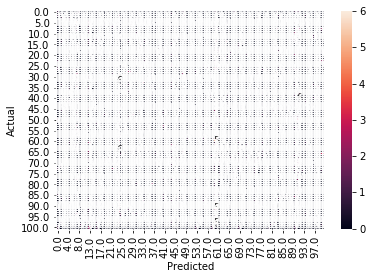

In [11]:
###################################################################################
# Accuracy                                                                        #
###################################################################################
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("Expected Accuracy: " + str(round(100/101,2)) + "%")
print("Actual Accuracy:   " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

# Heatmaped Confusion matrix... didnt work too good :D
data = {
    'predicted': prediction,
    'actual': y_encoded_testing.ravel()
}

df = pd.DataFrame(data, columns=['actual', 'predicted'])
conf_matrix = pd.crosstab(df['actual'], df['predicted'], rownames=['Actual'], colnames=['Predicted'], margins=False)

sb.heatmap(conf_matrix, annot=True, fmt="d")

# Standard
confusion_matrix(y_encoded_testing, prediction)

In [12]:
###################################################################################
# Logistic Regression                                                             #
###################################################################################
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='saga', multi_class='multinomial')
clf.fit(X_pca_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_pca_testing)

C:\Users\paulv\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Expected Accuracy: 0.99%
Actual Accuracy:   4.5%


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 1, 0]], dtype=int64)

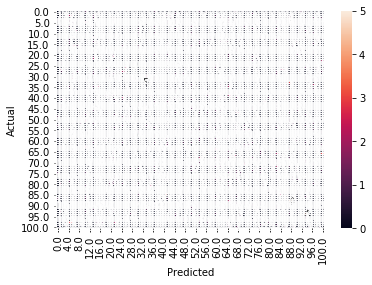

In [13]:
print("Expected Accuracy: " + str(round(100/101,2)) + "%")
print("Actual Accuracy:   " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

# Heatmaped Confusion matrix... didnt work too good :D
data = {
    'predicted': prediction,
    'actual': y_encoded_testing.ravel()
}

df = pd.DataFrame(data, columns=['actual', 'predicted'])
conf_matrix = pd.crosstab(df['actual'], df['predicted'], rownames=['Actual'], colnames=['Predicted'], margins=False)

sb.heatmap(conf_matrix, annot=True, fmt="d")

# Standard
confusion_matrix(y_encoded_testing, prediction)

In [14]:
###################################################################################
# SVM                                                                             #
###################################################################################
from sklearn import svm
clf = svm.SVC(gamma='scale', decision_function_shape='ovo')
clf.fit(X_pca_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_pca_testing)

Expected Accuracy: 0.99%
Actual Accuracy:   6.9%


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 0, 1]], dtype=int64)

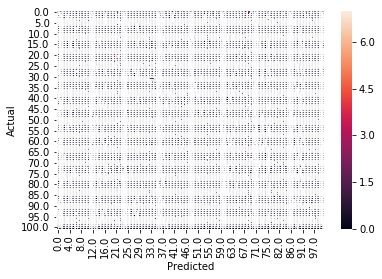

In [15]:
print("Expected Accuracy: " + str(round(100/101,2)) + "%")
print("Actual Accuracy:   " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

# Heatmaped Confusion matrix... didnt work too good :D
data = {
    'predicted': prediction,
    'actual': y_encoded_testing.ravel()
}

df = pd.DataFrame(data, columns=['actual', 'predicted'])
conf_matrix = pd.crosstab(df['actual'], df['predicted'], rownames=['Actual'], colnames=['Predicted'], margins=False)

sb.heatmap(conf_matrix, annot=True, fmt="d")

# Standard
confusion_matrix(y_encoded_testing, prediction)

In [16]:
###################################################################################
# Neural Networks - first try                                                     #
###################################################################################
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2))
clf.fit(X_pca_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_pca_testing)

Expected Accuracy: 0.99%
Actual Accuracy:   2.7%


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

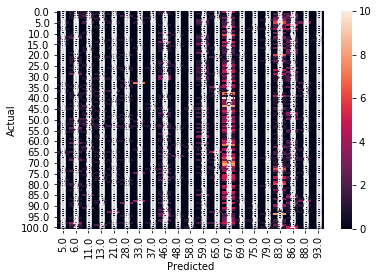

In [17]:
print("Expected Accuracy: " + str(round(100/101,2)) + "%")
print("Actual Accuracy:   " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

# Heatmaped Confusion matrix... didnt work too good :D
data = {
    'predicted': prediction,
    'actual': y_encoded_testing.ravel()
}

df = pd.DataFrame(data, columns=['actual', 'predicted'])
conf_matrix = pd.crosstab(df['actual'], df['predicted'], rownames=['Actual'], colnames=['Predicted'], margins=False)

sb.heatmap(conf_matrix, annot=True, fmt="d")

# Standard
confusion_matrix(y_encoded_testing, prediction)


In [18]:
###################################################################################
# Neural Networks - second try                                                    #
###################################################################################
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(activation='tanh', solver='adam', alpha=1e-5, learning_rate='adaptive', max_iter=300, hidden_layer_sizes=(300, 400))
clf.fit(X_pca_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_pca_testing)

Expected Accuracy: 0.99%
Actual Accuracy:   3.6999999999999997%


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

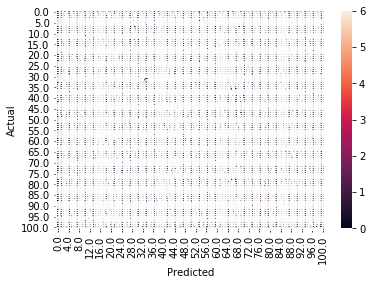

In [19]:
print("Expected Accuracy: " + str(round(100/101,2)) + "%")
print("Actual Accuracy:   " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

# Heatmaped Confusion matrix... didnt work too good :D
data = {
    'predicted': prediction,
    'actual': y_encoded_testing.ravel()
}

df = pd.DataFrame(data, columns=['actual', 'predicted'])
conf_matrix = pd.crosstab(df['actual'], df['predicted'], rownames=['Actual'], colnames=['Predicted'], margins=False)

sb.heatmap(conf_matrix, annot=True, fmt="d")

# Standard
confusion_matrix(y_encoded_testing, prediction)


In [20]:
###################################################################################
# Neural Networks - third try                                                     #
###################################################################################
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(activation='tanh', solver='adam', alpha=1e-5, learning_rate='adaptive', max_iter=300, hidden_layer_sizes=(300, 400, 300, 400))
clf.fit(X_pca_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_pca_testing)

Expected Accuracy: 0.99%
Actual Accuracy:   2.6%


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

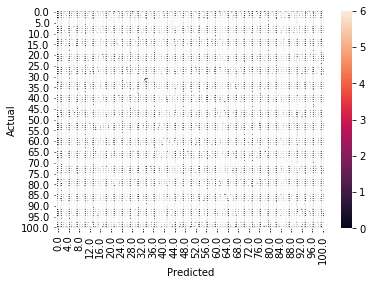

In [21]:
print("Expected Accuracy: " + str(round(100/101,2)) + "%")
print("Actual Accuracy:   " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

# Heatmaped Confusion matrix... didnt work too good :D
data = {
    'predicted': prediction,
    'actual': y_encoded_testing.ravel()
}

df = pd.DataFrame(data, columns=['actual', 'predicted'])
conf_matrix = pd.crosstab(df['actual'], df['predicted'], rownames=['Actual'], colnames=['Predicted'], margins=False)

sb.heatmap(conf_matrix, annot=True, fmt="d")

# Standard
confusion_matrix(y_encoded_testing, prediction)

In [22]:
###################################################################################
# Neural Networks - fourth try                                                    #
###################################################################################
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(activation='tanh', solver='adam', alpha=1e-5, learning_rate='adaptive', max_iter=300, hidden_layer_sizes=(300, 400, 300, 400, 300, 400, 300, 400, 300, 400))
clf.fit(X_pca_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_pca_testing)

Expected Accuracy: 0.99%
Actual Accuracy:   2.7%


array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 2, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 0, 0]], dtype=int64)

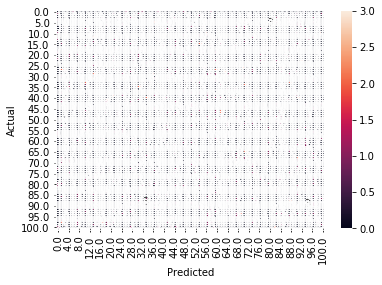

In [23]:
print("Expected Accuracy: " + str(round(100/101,2)) + "%")
print("Actual Accuracy:   " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

# Heatmaped Confusion matrix... didnt work too good :D
data = {
    'predicted': prediction,
    'actual': y_encoded_testing.ravel()
}

df = pd.DataFrame(data, columns=['actual', 'predicted'])
conf_matrix = pd.crosstab(df['actual'], df['predicted'], rownames=['Actual'], colnames=['Predicted'], margins=False)

sb.heatmap(conf_matrix, annot=True, fmt="d")

# Standard
confusion_matrix(y_encoded_testing, prediction)

In [24]:
###################################################################################
# Split into train and validation                                                 #
###################################################################################
from sklearn.model_selection import train_test_split
results = train_test_split(X_training, y_encoded_training, test_size=0.2, random_state=0)
X_training_split, X_validation_split, y_training_split, y_validation_split = results

# Prints the size
print("--------------------------------------")
print("Training X Data: ", X_training_split.shape)
print("Training y Data: ", y_training_split.shape) # Changed from y_encoded_training_split
print("--------------------------------------")
print("Validation X Data:  ", X_validation_split.shape)
print("Validation y Data:  ", y_validation_split.shape)
print("--------------------------------------")

--------------------------------------
Training X Data:  (8079, 64, 64, 3)
Training y Data:  (8079, 1)
--------------------------------------
Validation X Data:   (2020, 64, 64, 3)
Validation y Data:   (2020, 1)
--------------------------------------


In [25]:
###################################################################################
# CNN                                                                             #
###################################################################################
# Reference:
#   https://www.datacamp.com/community/tutorials/convolutional-neural-networks-python

import keras
from keras.models import Sequential, Input, Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU

# Converts the values into the 0-1 range
X_float_training = X_training_split / 255
X_float_validation = X_validation_split / 255
X_float_testing = X_testing / 255

# Parameters for the CNN
batch_size = 64
epochs = 20
num_classes = 101

# Sets up the CNN
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(64,64,3),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))                  
fashion_model.add(Dense(num_classes, activation='softmax'))

# Compiles the layers
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

# Visualize the layers
fashion_model.summary()

Using TensorFlow backend.








_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 128)       73856     
____

In [26]:
fashion_train = fashion_model.fit(X_training_split, decode_all(y_training_split), batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_validation_split, decode_all(y_validation_split)))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 8079 samples, validate on 2020 samples
Epoch 1/20
8079/8079 [==============================] - 44s 5ms/step - loss: 15.9664 - acc: 0.0094 - val_loss: 15.8947 - val_acc: 0.0139
Epoch 2/20
8079/8079 [==============================] - 44s 5ms/step - loss: 15.9665 - acc: 0.0094 - val_loss: 15.8947 - val_acc: 0.0139
Epoch 3/20
8079/8079 [==============================] - 38s 5ms/step - loss: 15.9665 - acc: 0.0094 - val_loss: 15.8947 - val_acc: 0.0139
Epoch 4/20
8079/8079 [==============================] - 36s 4ms/step - loss: 15.9665 - acc: 0.0094 - val_loss: 15.8947 - val_acc: 0.0139
Epoch 5/20
8079/8079 [==============================] - 37s 5ms/step - loss: 15.9665 - acc: 0.0094 - val_loss: 15.8947 - val_acc: 0.0139
Epoch 6/20
8079/8079 [==============================] - 37s 5ms/step - loss: 15.9665 - acc: 0.0094 - val_loss: 15.8947 - val_acc: 0.0139
Epoch 7/20
8079/8079 [=============

In [27]:
fashion_train = fashion_model.fit(X_float_training, decode_all(y_training_split), batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(X_float_validation, decode_all(y_validation_split)))

Train on 8079 samples, validate on 2020 samples
Epoch 1/20
8079/8079 [==============================] - 39s 5ms/step - loss: 4.7292 - acc: 0.0151 - val_loss: 4.5661 - val_acc: 0.0139
Epoch 2/20
8079/8079 [==============================] - 38s 5ms/step - loss: 4.4764 - acc: 0.0340 - val_loss: 4.3873 - val_acc: 0.0441
Epoch 3/20
8079/8079 [==============================] - 37s 5ms/step - loss: 4.3183 - acc: 0.0537 - val_loss: 4.2943 - val_acc: 0.0589
Epoch 4/20
8079/8079 [==============================] - 37s 5ms/step - loss: 4.1893 - acc: 0.0720 - val_loss: 4.2417 - val_acc: 0.0698
Epoch 5/20
8079/8079 [==============================] - 38s 5ms/step - loss: 4.0373 - acc: 0.0946 - val_loss: 4.2117 - val_acc: 0.0772
Epoch 6/20
8079/8079 [==============================] - 39s 5ms/step - loss: 3.8673 - acc: 0.1129 - val_loss: 4.2221 - val_acc: 0.0767
Epoch 7/20
8079/8079 [==============================] - 38s 5ms/step - loss: 3.6778 - acc: 0.1474 - val_loss: 4.2458 - val_acc: 0.0802
Epoch 8

In [28]:
test_eval = fashion_model.evaluate(X_float_testing, decode_all(y_encoded_testing), verbose=0)
print('Test loss:     ' + str(test_eval[0]))
print('Test accuracy: ' + str(test_eval[1]*100) + "%")

Test loss:     10.802085998535157
Test accuracy: 6.5%


In [29]:
def get_max(row):
    return np.argmax(row)

def map_all(categories):
    arr = np.empty([categories.shape[0],1])
    for i in range(np.size(categories,0)):
        arr[i] = get_max(categories[i,:])
    return arr

predicted_classes = fashion_model.predict(X_float_testing)
best_predictions = map_all(predicted_classes)

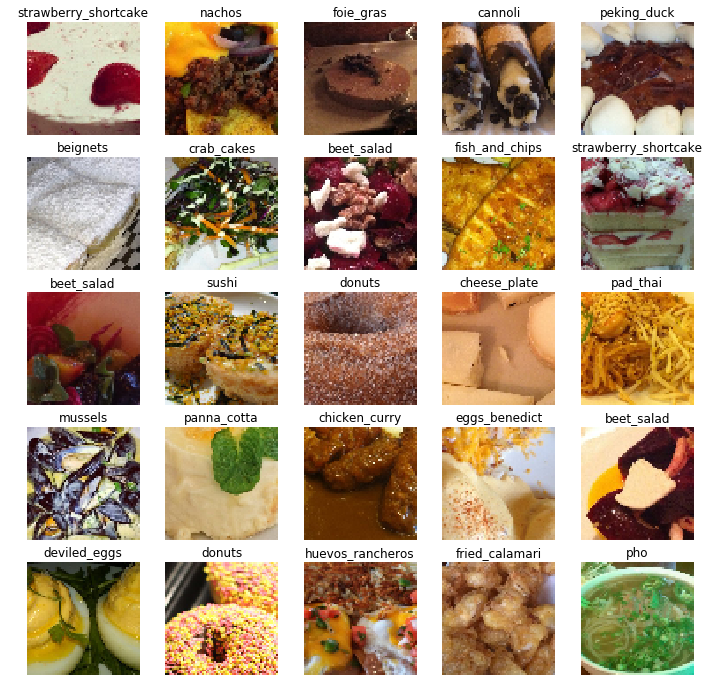

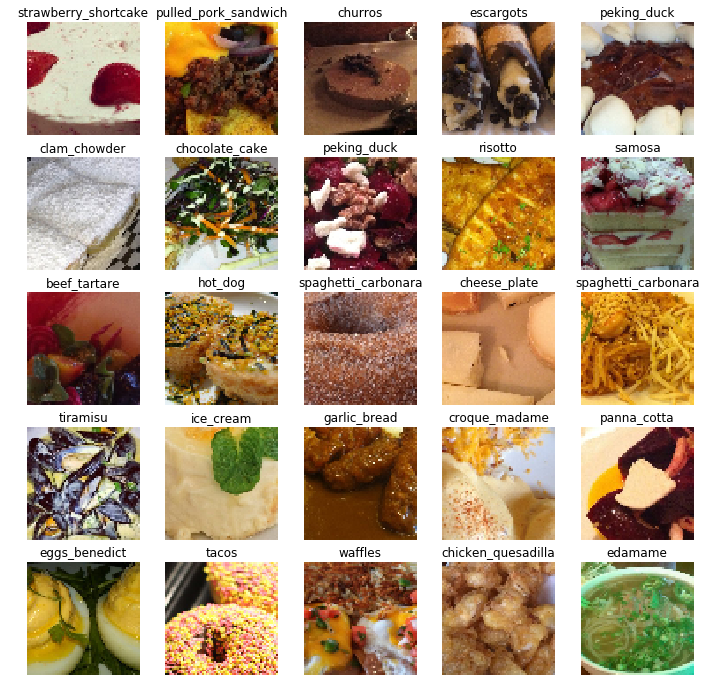

In [30]:
displayImages(X_float_testing, to_bool(decode_all(y_encoded_testing)))
displayImages(X_float_testing, to_bool(decode_all(best_predictions)))

# Finding New Features
Another interesting relationship we would like to test are:
 - colors of certain points in image
 - number of edges
 - direction of edges

## Colors of certain points in image
Taking the color of critical points in the image:
 - center
 - rule of thirds (common places to find the subject of a photo are at (1/3,1/3), (2/3,1/3), (1/3,2/3), (2/3,2/3)
 - average

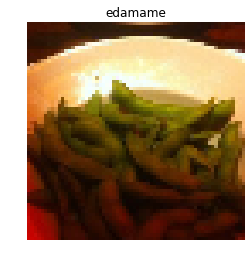

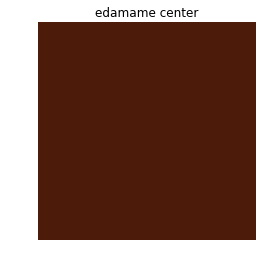

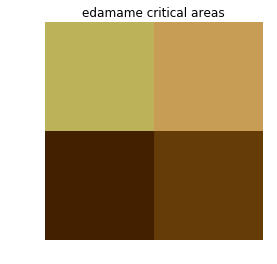

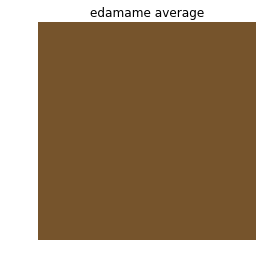

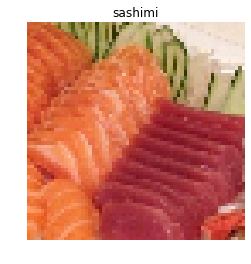

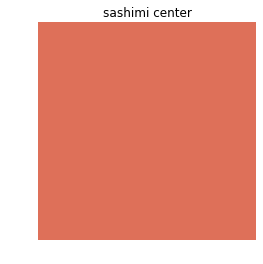

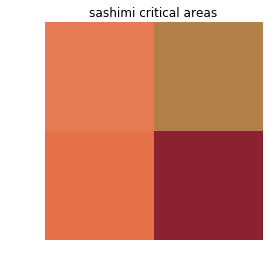

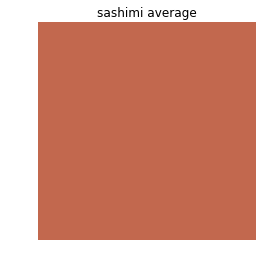

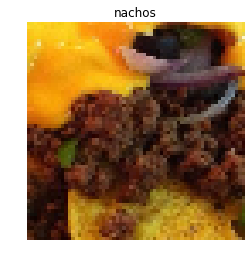

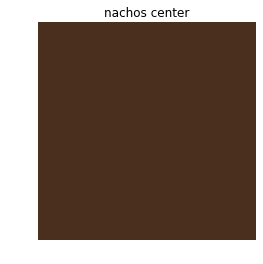

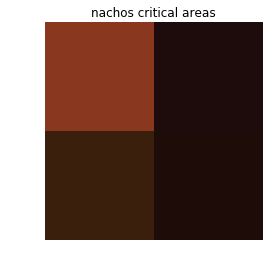

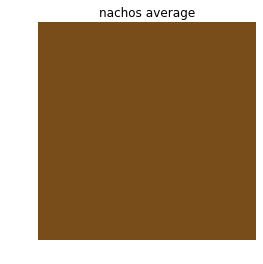

In [32]:
def center_colors(images, width=64, height=64):
    arr = np.empty([images.shape[0],1,3])
    for i in range(np.size(images,0)):
        arr[i,0] = [images[i, width//2, height//2, 0], images[i, width//2, height//2, 1], images[i, width//2, height//2, 2]]
    return arr.astype(int)

def critical_areas(images, width=64, height=64):
    arr = np.empty([images.shape[0],4,3])
    for i in range(np.size(images,0)):
        arr[i,0] = [images[i,   width//3,   height//3, 0], images[i,   width//3,   height//3, 1], images[i,   width//3,   height//3, 2]]
        arr[i,1] = [images[i, 2*width//3,   height//3, 0], images[i, 2*width//3,   height//3, 1], images[i, 2*width//3,   height//3, 2]]
        arr[i,2] = [images[i,   width//3, 2*height//3, 0], images[i,   width//3, 2*height//3, 1], images[i,   width//3, 2*height//3, 2]]
        arr[i,3] = [images[i, 2*width//3, 2*height//3, 0], images[i, 2*width//3, 2*height//3, 1], images[i, 2*width//3, 2*height//3, 2]]
    return arr.astype(int)

def average_colors(images, width=64, height=64):
    num_colors = width*height
    arr = np.empty([images.shape[0],1,3])
    for i in range(np.size(images,0)):
        r = np.mean(images[i, :, :, 0])
        g = np.mean(images[i, :, :, 1])
        b = np.mean(images[i, :, :, 2])
        arr[i,0] = [r, g, b]
    return arr.astype(int)

def to_image_center(color):
    data = np.empty([1,1,3])
    data[0,0] = [color[0,0], color[0,1], color[0,2]]
    return data.astype(int)

def to_image_areas(areas):
    data = np.empty([2,2,3])
    data[0,0] = [areas[0,0], areas[0,1], areas[0,2]]
    data[1,0] = [areas[1,0], areas[1,1], areas[1,2]]
    data[0,1] = [areas[2,0], areas[2,1], areas[2,2]]
    data[1,1] = [areas[3,0], areas[3,1], areas[3,2]]
    return data.astype(int)

def to_image_average(color):
    data = np.empty([1,1,3])
    data[0,0] = [color[0,0], color[0,1], color[0,2]]
    return data.astype(int)

def displayCenter(centers, categories, index):
    plt.imshow(to_image_center(centers[index]))
    plt.axis('off')
    plt.title(str(labels[np.argmax(categories[index])]) + ' center')
    plt.show()
    
def displayAreas(areas, categories, index):
    plt.imshow(to_image_areas(areas[index]))
    plt.axis('off')
    plt.title(str(labels[np.argmax(categories[index])]) + ' critical areas')
    plt.show()

def displayAverage(averages, categories, index):
    plt.imshow(to_image_center(averages[index]))
    plt.axis('off')
    plt.title(str(labels[np.argmax(categories[index])]) + ' average')
    plt.show()

def compare_data(images, centers, areas, averages, categories, sample_index, width=64, height=64):
    displayImage(images, categories, sample_index)
    displayCenter(centers, categories, sample_index)
    displayAreas(areas, categories, sample_index)
    displayAverage(averages, categories, sample_index)

# Transform data for training sets
X_centers_training = center_colors(X_training)
X_areas_training = critical_areas(X_training)
X_average_training = average_colors(X_training)

# Transform data for testing sets
X_centers_testing = center_colors(X_testing)
X_areas_testing = critical_areas(X_testing)
X_average_testing = average_colors(X_testing)

compare_data(X_training, X_centers_training, X_areas_training, X_average_training, y_training, 0)
compare_data(X_training, X_centers_training, X_areas_training, X_average_training, y_training, 5)
compare_data(X_testing, X_centers_testing, X_areas_testing, X_average_testing, y_testing, 1)

# Reshaping the data - example
#X_centers_training.reshape(X_training.shape[0], 3)
#X_areas_training.reshape(X_training.shape[0], 12)
#X_average_training.reshape(X_training.shape[0], 3)

#X_centers_testing.reshape(X_testing.shape[0], 3)
#X_areas_testing.reshape(X_testing.shape[0], 12)
#X_average_testing.reshape(X_testing.shape[0], 3)

In [33]:
X_centers_reshape_training = X_centers_training.reshape(X_training.shape[0], 3)
X_areas_reshape_training = X_areas_training.reshape(X_training.shape[0], 12)
X_average_reshape_training = X_average_training.reshape(X_training.shape[0], 3)

X_centers_reshape_testing = X_centers_testing.reshape(X_testing.shape[0], 3)
X_areas_reshape_testing = X_areas_testing.reshape(X_testing.shape[0], 12)
X_average_reshape_testing = X_average_testing.reshape(X_testing.shape[0], 3)

### Naive Bayes
Testing the three types of features using Naive Bayes

In [34]:
###################################################################################
# Naive Bayes - color in center                                                   #
###################################################################################
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_centers_reshape_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_centers_reshape_testing)

In [35]:
###################################################################################
# Accuracy = color in center                                                      #
###################################################################################
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("Accuracy: " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

Accuracy: 3.2%


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
###################################################################################
# Naive Bayes - color in critical areas                                           #
###################################################################################
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_areas_reshape_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_areas_reshape_testing)

In [37]:
###################################################################################
# Accuracy = color in critical areas                                              #
###################################################################################
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("Accuracy: " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

Accuracy: 3.9%


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [38]:
###################################################################################
# Naive Bayes - average color                                                     #
###################################################################################
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_average_reshape_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_average_reshape_testing)

In [39]:
###################################################################################
# Accuracy = average color                                                        #
###################################################################################
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("Accuracy: " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

Accuracy: 3.9%


array([[0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Logistic Regression
Testing the three types of features using Logistic Regression

In [40]:
###################################################################################
# Logistic Regression - color in center                                           #
###################################################################################
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='saga', multi_class='multinomial')
clf.fit(X_centers_reshape_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_centers_reshape_testing)

In [41]:
###################################################################################
# Accuracy = color in center                                                      #
###################################################################################
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("Accuracy: " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

Accuracy: 3.8%


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [42]:
###################################################################################
# Logistic Regression - color in critical areas                                   #
###################################################################################
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='saga', multi_class='multinomial')
clf.fit(X_areas_reshape_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_areas_reshape_testing)

C:\Users\paulv\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [43]:
###################################################################################
# Accuracy - color in critical areas                                              #
###################################################################################
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("Accuracy: " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

Accuracy: 4.3999999999999995%


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [3, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [44]:
###################################################################################
# Logistic Regression - average color                                             #
###################################################################################
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='saga', multi_class='multinomial')
clf.fit(X_average_reshape_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_average_reshape_testing)

In [45]:
###################################################################################
# Accuracy - average color                                                        #
###################################################################################
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("Accuracy: " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

Accuracy: 4.2%


array([[0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### SVM
Testing the three types of features using SVM

In [46]:
###################################################################################
# SVM - color in center                                                           #
###################################################################################
from sklearn import svm
clf = svm.SVC(gamma='scale', decision_function_shape='ovo')
clf.fit(X_centers_reshape_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_centers_reshape_testing)

In [47]:
###################################################################################
# Accuracy - color in center                                                      #
###################################################################################
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("Accuracy: " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

Accuracy: 3.5000000000000004%


array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 4, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [48]:
###################################################################################
# SVM - color in critical areas                                                   #
###################################################################################
from sklearn import svm
clf = svm.SVC(gamma='scale', decision_function_shape='ovo')
clf.fit(X_areas_reshape_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_areas_reshape_testing)

In [49]:
###################################################################################
# Accuracy - color in critical areas                                              #
###################################################################################
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("Accuracy: " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

Accuracy: 4.7%


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
###################################################################################
# SVM - average color                                                             #
###################################################################################
from sklearn import svm
clf = svm.SVC(gamma='scale', decision_function_shape='ovo')
clf.fit(X_average_reshape_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_average_reshape_testing)

In [51]:
###################################################################################
# Accuracy - average color                                                        #
###################################################################################
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("Accuracy: " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

Accuracy: 6.0%


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 2],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 3]], dtype=int64)

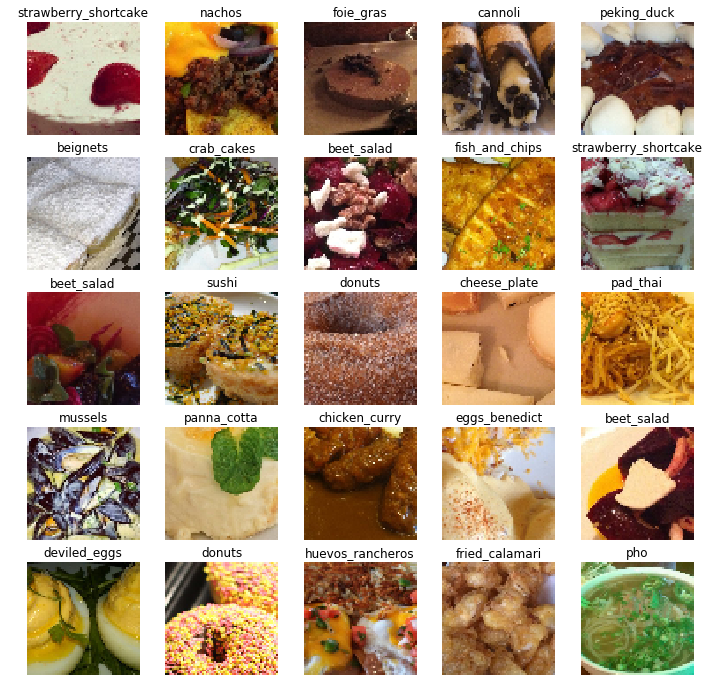

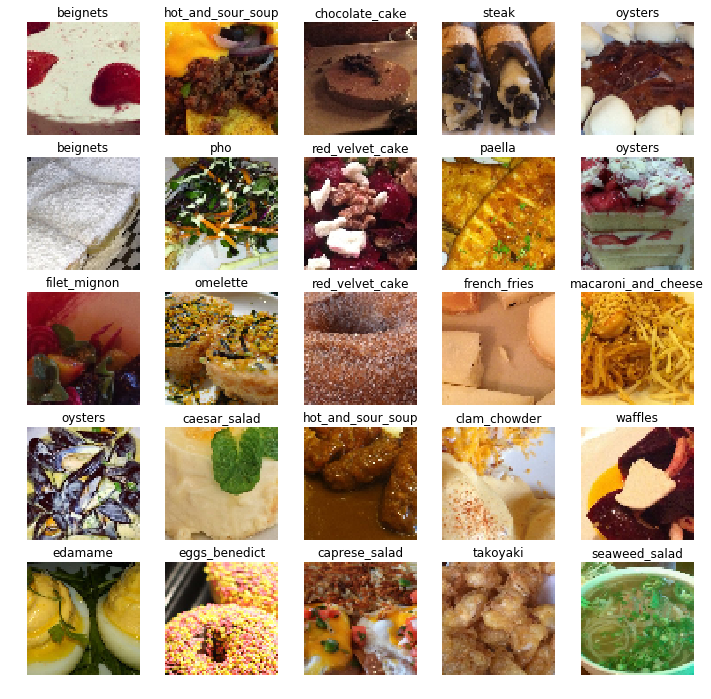

In [52]:
displayImages(X_testing, y_testing)
displayImages(X_testing, to_bool(decode_all(prediction)))

# Combining Average Colors and Critical Areas
The method of using critical points and the average colors works well. Combining the two methods might provide somemore information

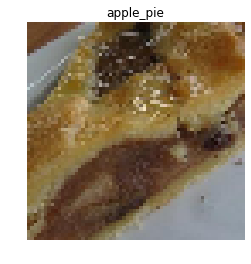

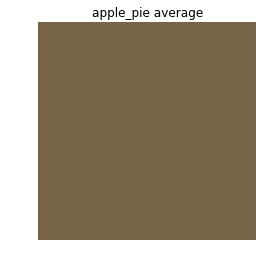

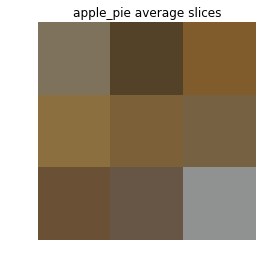

In [53]:
def critical_averages(images, slices=1, width=64, height=64):
    window_width = width//slices
    window_height = height//slices
    arr = np.empty([images.shape[0],slices**2,3])
    for i in range(np.size(images,0)):
        for row in range(slices):
            for col in range(slices):
                x1,x2 = row*window_width, (row+1)*window_width
                y1,y2 = col*window_height, (col+1)*window_height
                r = np.mean(images[i, x1:x2, y1:y2, 0])
                g = np.mean(images[i, x1:x2, y1:y2, 1])
                b = np.mean(images[i, x1:x2, y1:y2, 2])
                
                index = row*slices + col
                arr[i,index] = [r, g, b]
    return arr.astype(int)

def to_image_area_averages(areas, slices):
    data = np.empty([slices,slices,3])
    for i in range(slices):
        for j in range(slices):
            data[i,j] = [areas[i*slices + j, 0], areas[i*slices + j, 1], areas[i*slices + j, 2]]
    return data.astype(int)

def displayAverageAreas(areas, slices, categories, index):
    plt.imshow(to_image_area_averages(areas[index], slices))
    plt.axis('off')
    plt.title(str(labels[np.argmax(categories[index])]) + ' average slices')
    plt.show()

slices = 3
X_average_areas_training = critical_averages(X_training,slices)

# Display images as examples
displayImage(X_training, y_training, 10)
displayAverage(X_average_training, y_training, 10)
displayAverageAreas(X_average_areas_training, slices, y_training, 10)

### Naive Bayes
Testing different number of splits with Naive Bayes

In [54]:
###################################################################################
# Naive Bayes - 2 splits                                                          #
###################################################################################
slices = 2

# Gets the features of the data
X_average_areas_training = critical_averages(X_training,slices)
X_average_areas_testing = critical_averages(X_testing,slices)

# Reshapes the data for algorithms
X_average_areas_reshape_training = X_average_areas_training.reshape(X_training.shape[0], slices**2 * 3)
X_average_areas_reshape_testing = X_average_areas_testing.reshape(X_testing.shape[0], slices**2 * 3)

# Predicts the data
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_average_areas_reshape_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_average_areas_reshape_testing)

###################################################################################
# Accuracy                                                                        #
###################################################################################
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("Accuracy: " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

Accuracy: 4.3%


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [55]:
###################################################################################
# Naive Bayes - 3 splits                                                          #
###################################################################################
slices = 3

# Gets the features of the data
X_average_areas_training = critical_averages(X_training,slices)
X_average_areas_testing = critical_averages(X_testing,slices)

# Reshapes the data for algorithms
X_average_areas_reshape_training = X_average_areas_training.reshape(X_training.shape[0], slices**2 * 3)
X_average_areas_reshape_testing = X_average_areas_testing.reshape(X_testing.shape[0], slices**2 * 3)

# Predicts the data
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_average_areas_reshape_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_average_areas_reshape_testing)

###################################################################################
# Accuracy                                                                        #
###################################################################################
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("Accuracy: " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

Accuracy: 4.5%


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [56]:
###################################################################################
# Naive Bayes - 4 splits                                                          #
###################################################################################
slices = 4

# Gets the features of the data
X_average_areas_training = critical_averages(X_training,slices)
X_average_areas_testing = critical_averages(X_testing,slices)

# Reshapes the data for algorithms
X_average_areas_reshape_training = X_average_areas_training.reshape(X_training.shape[0], slices**2 * 3)
X_average_areas_reshape_testing = X_average_areas_testing.reshape(X_testing.shape[0], slices**2 * 3)

# Predicts the data
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_average_areas_reshape_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_average_areas_reshape_testing)

###################################################################################
# Accuracy                                                                        #
###################################################################################
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("Accuracy: " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

Accuracy: 4.5%


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Logistic Regression
Testing different number of splits with Logistic Regression

In [57]:
###################################################################################
# Logistic Regression - 2 slices                                                  #
###################################################################################
slices = 2

# Gets the features of the data
X_average_areas_training = critical_averages(X_training,slices)
X_average_areas_testing = critical_averages(X_testing,slices)

# Reshapes the data for algorithms
X_average_areas_reshape_training = X_average_areas_training.reshape(X_training.shape[0], slices**2 * 3)
X_average_areas_reshape_testing = X_average_areas_testing.reshape(X_testing.shape[0], slices**2 * 3)

# Predicts the data
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='saga', multi_class='multinomial')
clf.fit(X_average_areas_reshape_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_average_areas_reshape_testing)

###################################################################################
# Accuracy                                                                        #
###################################################################################
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("Accuracy: " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

Accuracy: 4.9%


C:\Users\paulv\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [58]:
###################################################################################
# Logistic Regression - 3 slices                                                  #
###################################################################################
slices = 3

# Gets the features of the data
X_average_areas_training = critical_averages(X_training,slices)
X_average_areas_testing = critical_averages(X_testing,slices)

# Reshapes the data for algorithms
X_average_areas_reshape_training = X_average_areas_training.reshape(X_training.shape[0], slices**2 * 3)
X_average_areas_reshape_testing = X_average_areas_testing.reshape(X_testing.shape[0], slices**2 * 3)

# Predicts the data
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='saga', multi_class='multinomial')
clf.fit(X_average_areas_reshape_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_average_areas_reshape_testing)

###################################################################################
# Accuracy                                                                        #
###################################################################################
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("Accuracy: " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

Accuracy: 6.1%


C:\Users\paulv\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [59]:
###################################################################################
# Logistic Regression - 4 slices                                                  #
###################################################################################
slices = 4

# Gets the features of the data
X_average_areas_training = critical_averages(X_training,slices)
X_average_areas_testing = critical_averages(X_testing,slices)

# Reshapes the data for algorithms
X_average_areas_reshape_training = X_average_areas_training.reshape(X_training.shape[0], slices**2 * 3)
X_average_areas_reshape_testing = X_average_areas_testing.reshape(X_testing.shape[0], slices**2 * 3)

# Predicts the data
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='saga', multi_class='multinomial')
clf.fit(X_average_areas_reshape_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_average_areas_reshape_testing)

###################################################################################
# Accuracy                                                                        #
###################################################################################
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("Accuracy: " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

Accuracy: 4.6%


C:\Users\paulv\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### SVM
Testing different number of splits with SVM

In [60]:
###################################################################################
# SVM - 2 slices                                                                  #
###################################################################################
slices = 2

# Gets the features of the data
X_average_areas_training = critical_averages(X_training,slices)
X_average_areas_testing = critical_averages(X_testing,slices)

# Reshapes the data for algorithms
X_average_areas_reshape_training = X_average_areas_training.reshape(X_training.shape[0], slices**2 * 3)
X_average_areas_reshape_testing = X_average_areas_testing.reshape(X_testing.shape[0], slices**2 * 3)

# Predicts the data
from sklearn import svm
clf = svm.SVC(gamma='scale', decision_function_shape='ovo')
clf.fit(X_average_areas_reshape_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_average_areas_reshape_testing)

###################################################################################
# Accuracy                                                                        #
###################################################################################
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("Accuracy: " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

Accuracy: 4.5%


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 1],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 2]], dtype=int64)

In [61]:
###################################################################################
# SVM - 3 slices                                                                  #
###################################################################################
slices = 3

# Gets the features of the data
X_average_areas_training = critical_averages(X_training,slices)
X_average_areas_testing = critical_averages(X_testing,slices)

# Reshapes the data for algorithms
X_average_areas_reshape_training = X_average_areas_training.reshape(X_training.shape[0], slices**2 * 3)
X_average_areas_reshape_testing = X_average_areas_testing.reshape(X_testing.shape[0], slices**2 * 3)

# Predicts the data
from sklearn import svm
clf = svm.SVC(gamma='scale', decision_function_shape='ovo')
clf.fit(X_average_areas_reshape_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_average_areas_reshape_testing)

###################################################################################
# Accuracy                                                                        #
###################################################################################
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("Accuracy: " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

Accuracy: 5.0%


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 1]], dtype=int64)

In [62]:
###################################################################################
# SVM - 4 slices                                                                  #
###################################################################################
slices = 4

# Gets the features of the data
X_average_areas_training = critical_averages(X_training,slices)
X_average_areas_testing = critical_averages(X_testing,slices)

# Reshapes the data for algorithms
X_average_areas_reshape_training = X_average_areas_training.reshape(X_training.shape[0], slices**2 * 3)
X_average_areas_reshape_testing = X_average_areas_testing.reshape(X_testing.shape[0], slices**2 * 3)

# Predicts the data
from sklearn import svm
clf = svm.SVC(gamma='scale', decision_function_shape='ovo')
clf.fit(X_average_areas_reshape_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_average_areas_reshape_testing)

###################################################################################
# Accuracy                                                                        #
###################################################################################
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("Accuracy: " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

Accuracy: 5.8999999999999995%


array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [63]:
###################################################################################
# SVM - 5 slices                                                                  #
###################################################################################
slices = 5

# Gets the features of the data
X_average_areas_training = critical_averages(X_training,slices)
X_average_areas_testing = critical_averages(X_testing,slices)

# Reshapes the data for algorithms
X_average_areas_reshape_training = X_average_areas_training.reshape(X_training.shape[0], slices**2 * 3)
X_average_areas_reshape_testing = X_average_areas_testing.reshape(X_testing.shape[0], slices**2 * 3)

# Predicts the data
from sklearn import svm
clf = svm.SVC(gamma='scale', decision_function_shape='ovo')
clf.fit(X_average_areas_reshape_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_average_areas_reshape_testing)

###################################################################################
# Accuracy                                                                        #
###################################################################################
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("Accuracy: " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

Accuracy: 5.8999999999999995%


array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

## Canny Edge Detection
Transforming the images with a Canny Edge Detection algorithm may also improve results

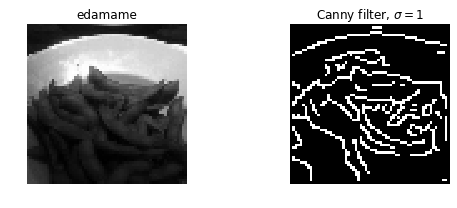

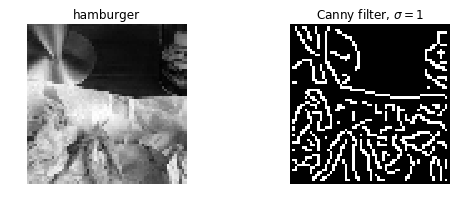

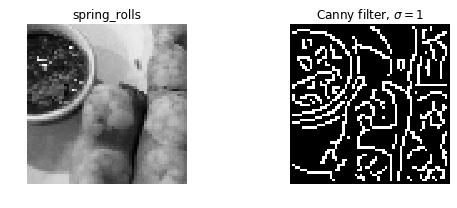

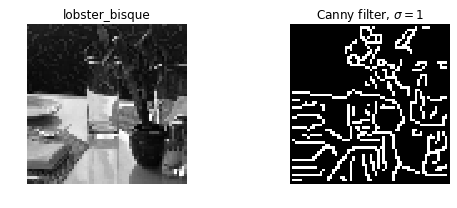

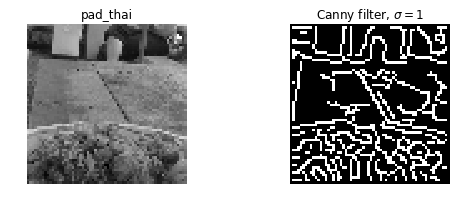

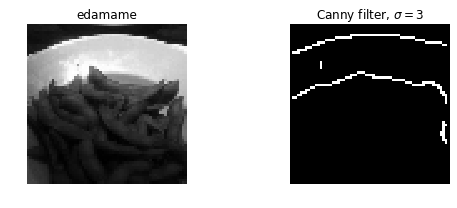

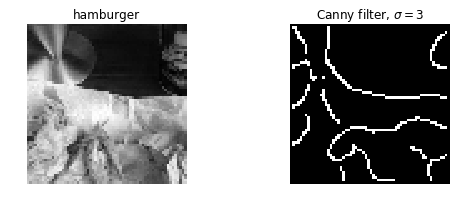

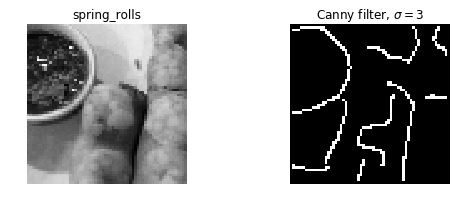

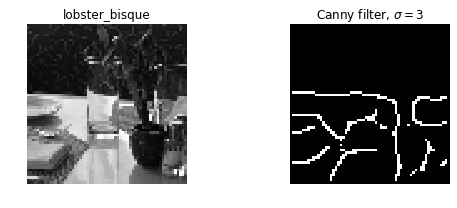

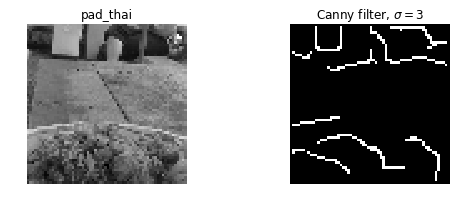

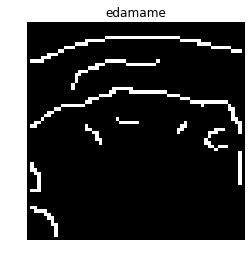

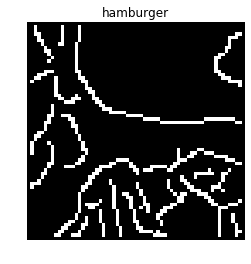

In [64]:
# https://scikit-image.org/docs/dev/auto_examples/edges/plot_canny.html
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature

def to_zero_one_images(images, width=64, height=64):
    arr = np.empty([images.shape[0],width,height])
    for i in range(np.size(images,0)):
        for row in range(width):
            for col in range(height):
                average = np.mean(images[i, row, col, :])
                arr[i,row,col] = average
    return arr / 255

def canny_image(images, categories, index, width=64, height=64, sigma=1):
    edges = feature.canny(images[index], sigma=sigma)
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3), sharex=True, sharey=True)
    
    ax1.imshow(images[index], cmap=plt.cm.gray)
    ax1.axis('off')
    ax1.set_title(str(labels[np.argmax(categories[index])]))
    
    ax2.imshow(edges, cmap=plt.cm.gray)
    ax2.axis('off')
    ax2.set_title('Canny filter, $\sigma=' + str(sigma) + '$')
    
    fig.tight_layout()
    plt.show()

def canny_images(images, width=64, height=64, sigma=1):
    arr = np.empty([images.shape[0],width,height])
    for i in range(np.size(images,0)):
        arr[i] = feature.canny(images[i], sigma=sigma)
    return arr

# Temporary variable - doing all takes too long
X_zero_one_temp = to_zero_one_images(X_training[:10])

sigma=1
canny_image(X_zero_one_temp, y_training, 0, sigma=sigma)
canny_image(X_zero_one_temp, y_training, 1, sigma=sigma)
canny_image(X_zero_one_temp, y_training, 2, sigma=sigma)
canny_image(X_zero_one_temp, y_training, 3, sigma=sigma)
canny_image(X_zero_one_temp, y_training, 4, sigma=sigma)

sigma=3
canny_image(X_zero_one_temp, y_training, 0, sigma=sigma)
canny_image(X_zero_one_temp, y_training, 1, sigma=sigma)
canny_image(X_zero_one_temp, y_training, 2, sigma=sigma)
canny_image(X_zero_one_temp, y_training, 3, sigma=sigma)
canny_image(X_zero_one_temp, y_training, 4, sigma=sigma)

X_canny_images_temp = canny_images(X_zero_one_temp, sigma=2)
displayImage(X_canny_images_temp.reshape([X_canny_images_temp.shape[0], 64, 64, 1]), y_training, 0)
displayImage(X_canny_images_temp.reshape([X_canny_images_temp.shape[0], 64, 64, 1]), y_training, 1)

# Canny Images Classification
Running classification algorithms on Canny Images

In [65]:
# Creates the zero one mapping for all images
print('Converting training set... ', end='')
X_zero_one_training = to_zero_one_images(X_training)
print('Done')

print('Converting testing set...  ', end='')
X_zero_one_testing = to_zero_one_images(X_testing)
print('Done')

# Performs Canny Image Edge Detection on all images
print('Performing Canny Edge Detection (sigma=1)... ', end='')
X_canny_images1_training = canny_images(X_zero_one_training, sigma=1)
X_canny_images1_testing = canny_images(X_zero_one_testing, sigma=1)
print('Done')

print('Performing Canny Edge Detection (sigma=2)... ', end='')
X_canny_images2_training = canny_images(X_zero_one_training, sigma=2)
X_canny_images2_testing = canny_images(X_zero_one_testing, sigma=2)
print('Done')

print('Performing Canny Edge Detection (sigma=3)... ', end='')
X_canny_images3_training = canny_images(X_zero_one_training, sigma=3)
X_canny_images3_testing = canny_images(X_zero_one_testing, sigma=3)
print('Done')

Converting training set... Done
Converting testing set...  Done
Performing Canny Edge Detection (sigma=1)... Done
Performing Canny Edge Detection (sigma=2)... Done
Performing Canny Edge Detection (sigma=3)... Done


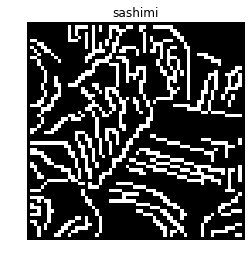

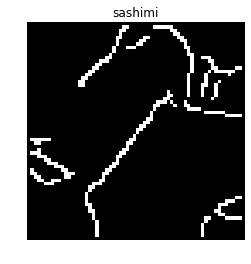

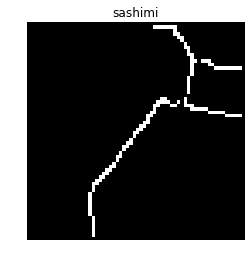

In [66]:
displayImage(X_canny_images1_training.reshape([X_canny_images2_training.shape[0], 64, 64, 1]), y_training, 5)
displayImage(X_canny_images2_training.reshape([X_canny_images2_training.shape[0], 64, 64, 1]), y_training, 5)
displayImage(X_canny_images3_training.reshape([X_canny_images3_training.shape[0], 64, 64, 1]), y_training, 5)

In [67]:
X_canny_images1_reshape_training = X_canny_images1_training.reshape(X_training.shape[0], 64*64)
X_canny_images1_reshape_testing = X_canny_images1_testing.reshape(X_testing.shape[0], 64*64)

X_canny_images2_reshape_training = X_canny_images2_training.reshape(X_training.shape[0], 64*64)
X_canny_images2_reshape_testing = X_canny_images2_testing.reshape(X_testing.shape[0], 64*64)

X_canny_images3_reshape_training = X_canny_images3_training.reshape(X_training.shape[0], 64*64)
X_canny_images3_reshape_testing = X_canny_images3_testing.reshape(X_testing.shape[0], 64*64)

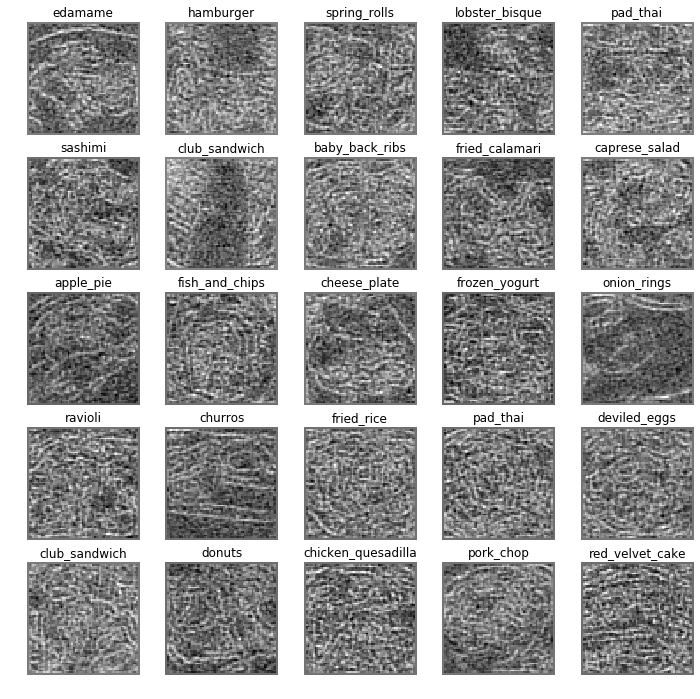

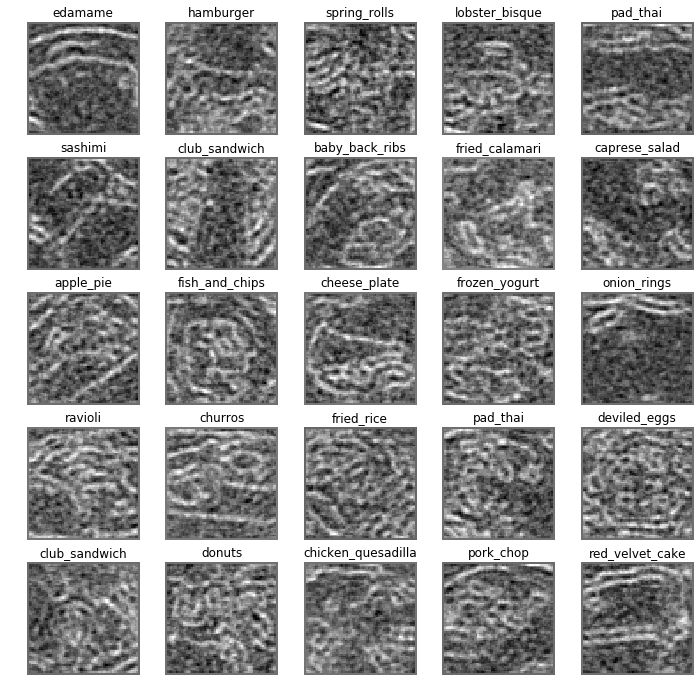

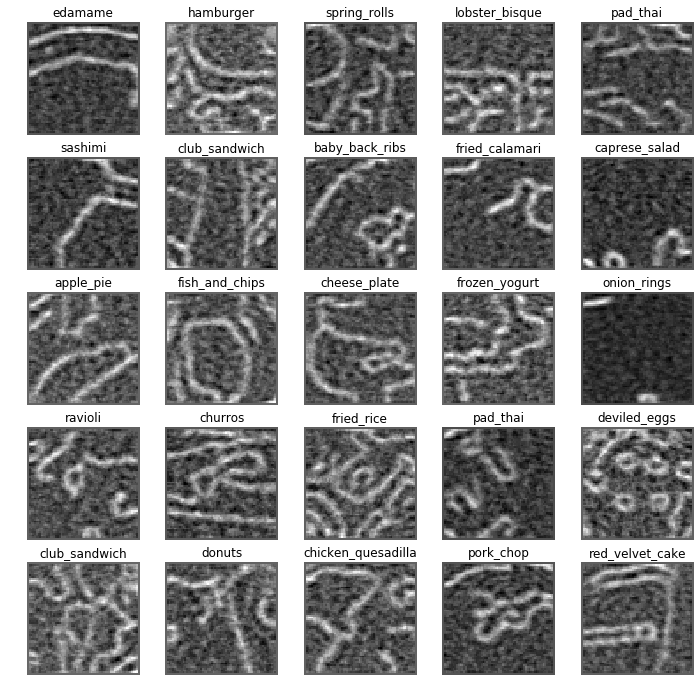

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def to_PCA(X_canny_training, X_canny_testing, y_training, principal_components=100):
    scaler = StandardScaler()
    scaler.fit(X_canny_training)
    X_scaled_canny_training = scaler.transform(X_canny_training)
    X_scaled_canny_testing = scaler.transform(X_canny_testing)
    
    pca = PCA(n_components=principal_components)
    pca.fit(X_scaled_canny_training)
    X_pca_canny_training = pca.transform(X_scaled_canny_training)
    X_pca_canny_testing = pca.transform(X_scaled_canny_testing)
    
    X_pca_inverse = pca.inverse_transform(X_pca_canny_training)
    X_pca_inverse = X_pca_inverse.reshape([X_pca_inverse.shape[0], X_shape[0], X_shape[1], 1])
    displayImages(X_pca_inverse, y_training)
    
    return X_pca_canny_training, X_pca_canny_testing

# Runs the PCA algorithm with 100 principal components
X_pca_canny1_training, X_pca_canny1_testing = to_PCA(X_canny_images1_reshape_training, X_canny_images1_reshape_testing, y_training, 500)
X_pca_canny2_training, X_pca_canny2_testing = to_PCA(X_canny_images2_reshape_training, X_canny_images2_reshape_testing, y_training, 250)
X_pca_canny3_training, X_pca_canny3_testing = to_PCA(X_canny_images3_reshape_training, X_canny_images3_reshape_testing, y_training, 250)

### Naive Bayes
Testing different canny edges with Naive Bayes

In [78]:
###################################################################################
# Naive Bayes - sigma=1                                                           #
###################################################################################
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_pca_canny1_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_pca_canny1_testing)

###################################################################################
# Accuracy                                                                        #
###################################################################################
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("Accuracy: " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

Accuracy: 1.0999999999999999%


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [79]:
###################################################################################
# Naive Bayes - sigma=2                                                           #
###################################################################################
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_pca_canny2_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_pca_canny2_testing)

###################################################################################
# Accuracy                                                                        #
###################################################################################
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("Accuracy: " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

Accuracy: 1.5%


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [80]:
###################################################################################
# Naive Bayes - sigma=3                                                           #
###################################################################################
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_pca_canny3_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_pca_canny3_testing)

###################################################################################
# Accuracy                                                                        #
###################################################################################
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("Accuracy: " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

Accuracy: 1.2%


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### Logistic Regression
Testing different canny edges with Logistic Regression

In [ ]:
###################################################################################
# Logistic Regression - sigma=1                                                   #
###################################################################################
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='saga', multi_class='multinomial')
clf.fit(X_pca_canny1_training, np.ravel(y_encoded_training))
prediction = clf.predict(X_pca_canny1_testing)

###################################################################################
# Accuracy                                                                        #
###################################################################################
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print("Accuracy: " + str(metrics.accuracy_score(y_encoded_testing, prediction)*100) + "%")
confusion_matrix(y_encoded_testing, prediction)

### SVM
Testing different canny edges with SVM

# Hot Dog or Not Hot Dog - [Inspiration](https://www.youtube.com/watch?v=pqTntG1RXSY)

## Creating Hotdog Datasets

In [ ]:
# PCA & Labels :
# X_pca_training
# X_pca_testing
# y_pca_training
# y_pca_testing

# Find index of
hot_dog_index = 0
for index, label in enumerate(labels):
    if label == 'hot_dog':
        hot_dog_index = index

# print(y_pca_training)

# Create new Y Data for Hotdog / No Hotdog
y_hotdog_training = []
y_hotdog_testing = []
num_dogs = 0
num_dogs_test = 0
hot_dog_examples = []

# Create hotdog training data (true if hotdog, false if not)
for index, item in enumerate(y_pca_training):
    if item[hot_dog_index] == True:
        y_hotdog_training.append(True)
        num_dogs = num_dogs + 1
        hot_dog_examples.append(index)
    else: 
        y_hotdog_training.append(False)

# Repeat for Testing 
for index, item in enumerate(y_pca_testing):
    if item[hot_dog_index] == True:
        y_hotdog_testing.append(True)
        num_dogs_test = num_dogs_test + 1
        hot_dog_examples.append(index)
    else: 
        y_hotdog_testing.append(False)


# print(num_dogs)
# print(hot_dog_examples)
# print(y_hotdog_testing)

y_hotdog_training = np.array(y_hotdog_training)
y_hotdog_testing = np.array(y_hotdog_testing)

## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix

clf = GaussianNB()
clf.fit(X_pca_training, np.ravel(y_hotdog_training))
prediction = clf.predict(X_pca_testing)

print("Expected Accuracy: " + str(round(100/2,2)) + "%")
print("Actual Accuracy:   " + str(metrics.accuracy_score(y_hotdog_testing, prediction)*100) + "%")
confusion_matrix(y_hotdog_testing, prediction)

data = {
    'predicted': prediction,
    'actual': y_hotdog_testing.ravel()
}

df = pd.DataFrame(data, columns=['actual', 'predicted'])
conf_matrix = pd.crosstab(df['actual'], df['predicted'], rownames=['Actual'], colnames=['Predicted'], margins=False)

sb.heatmap(conf_matrix, annot=True, fmt="d")

# Standard
confusion_matrix(y_hotdog_testing, prediction)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='lbfgs', multi_class='multinomial')
clf.fit(X_pca_training, np.ravel(y_hotdog_training))
prediction = clf.predict(X_pca_testing)

print("Expected Accuracy: " + str(round(100/2,2)) + "%")
print("Actual Accuracy:   " + str(metrics.accuracy_score(y_hotdog_testing, prediction)*100) + "%")
confusion_matrix(y_hotdog_testing, prediction)

data = {
    'predicted': prediction,
    'actual': y_hotdog_testing.ravel()
}

df = pd.DataFrame(data, columns=['actual', 'predicted'])
conf_matrix = pd.crosstab(df['actual'], df['predicted'], rownames=['Actual'], colnames=['Predicted'], margins=False)

sb.heatmap(conf_matrix, annot=True, fmt="d")

# Standard
confusion_matrix(y_hotdog_testing, prediction)

## SVM

In [ ]:
from sklearn import svm
clf = svm.SVC(gamma='scale', decision_function_shape='ovo')
clf.fit(X_pca_training, np.ravel(y_hotdog_training))
prediction = clf.predict(X_pca_testing)

print("Expected Accuracy: " + str(round(100/2,2)) + "%")
print("Actual Accuracy:   " + str(metrics.accuracy_score(y_hotdog_testing, prediction)*100) + "%")
confusion_matrix(y_hotdog_testing, prediction)


data = {
    'predicted': prediction,
    'actual': y_hotdog_testing.ravel()
}

df = pd.DataFrame(data, columns=['actual', 'predicted'])
conf_matrix = pd.crosstab(df['actual'], df['predicted'], rownames=['Actual'], colnames=['Predicted'], margins=False)

sb.heatmap(conf_matrix, annot=True, fmt="d")

# Standard
confusion_matrix(y_hotdog_testing, prediction)